<a href="https://colab.research.google.com/github/rickyyhs/kmeans-clustering/blob/main/KMean_Clustering_HELP_INTERNATIONAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering the Countries by using Unsupervised Learning for HELP International

###**Objective**:

To categorise the countries using socio-economic and health factors that determine the overall development of the country.


### **About organization**:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.


###**Problem Statement**:

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [109]:
#pip install plotly --upgrade

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import zipfile
print('all imported')

all imported


In [111]:
path = '/content/HELP_INTERNATIONAL.zip'

zip = zipfile.ZipFile(path, 'r')
zip.extractall('/content')
zip.close()

In [112]:
dict_path = '/content/data-dictionary.csv'

dict_data = pd.read_csv(dict_path)

In [113]:
print('---ATTRIBUTE DESCRIPTION---\n')
for i in range(10):
  print(dict_data['Column Name'].iloc[i] + ": " + dict_data['Description'].iloc[i])
  print('')

---ATTRIBUTE DESCRIPTION---

country: Name of the country

child_mort: Death of children under 5 years of age per 1000 live births

exports: Exports of goods and services per capita. Given as %age of the GDP per capita

health: Total health spending per capita. Given as %age of GDP per capita

imports: Imports of goods and services per capita. Given as %age of the GDP per capita

Income: Net income per person

Inflation: The measurement of the annual growth rate of the Total GDP

life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same

total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.

gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.



# Data Wrangling & Preprocessing

In [114]:
country_data_path = '/content/Country-data.csv'
country_data = pd.read_csv(country_data_path)

In [115]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [116]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [117]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [118]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [119]:
for col in country_data.select_dtypes(exclude='object').columns:
  print(f'Missing Value "{col}": {country_data[col].isna().sum()}')

Missing Value "child_mort": 0
Missing Value "exports": 0
Missing Value "health": 0
Missing Value "imports": 0
Missing Value "income": 0
Missing Value "inflation": 0
Missing Value "life_expec": 0
Missing Value "total_fer": 0
Missing Value "gdpp": 0


In [120]:
country_data_tidy = country_data.drop('country', axis=1)

Q1 = country_data_tidy.quantile(0.25)
Q3 = country_data_tidy.quantile(0.75)
IQR = Q3 - Q1
min = Q1 - (1.5 * IQR)
max = Q3 + (1.5 * IQR )
lower_than = (country_data_tidy < min)
more_than = (country_data_tidy > max)
total_outliers = np.sum(lower_than | more_than )

print(f'Total Outlier:\n{total_outliers}')

Total Outlier:
child_mort     4
exports        5
health         2
imports        4
income         8
inflation      5
life_expec     3
total_fer      1
gdpp          25
dtype: int64


In [121]:
country_data_tidy = country_data_tidy.mask(lower_than, min, axis=1)
country_data_tidy = country_data_tidy.mask(more_than, max, axis=1)

In [122]:
Q1 = country_data_tidy.quantile(0.25)
Q3 = country_data_tidy.quantile(0.75)
IQR = Q3 - Q1
min = Q1 - (1.5 * IQR)
max = Q3 + (1.5 * IQR )
lower_than = (country_data_tidy < min)
more_than = (country_data_tidy > max)
total_outliers = np.sum(lower_than | more_than )

print(f'Total Outlier:\n{total_outliers}')

Total Outlier:
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [123]:
scaler = StandardScaler()
country_data_tidy_scaled = scaler.fit_transform(country_data_tidy)
country_data_tidy_scaled = pd.DataFrame(country_data_tidy_scaled, columns=country_data_tidy.columns)
country_data_tidy_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686


# Creating & Evaluating the Model

In [124]:
pca = PCA(n_components=2)
country_data_pca = pca.fit_transform(country_data_tidy_scaled)
country_data_pca = pd.DataFrame(country_data_pca, columns=['PC1', 'PC2'])
country_data_pca

,PC1,PC2
0,-3.177917,-0.251292
1,0.434979,-0.218700
2,-0.416784,-0.613870
3,-3.306409,1.066649
4,1.253246,0.547778
...,...,...
162,-0.882087,0.945856
163,-0.240053,-1.742315
164,0.305579,2.152785
165,-2.271105,-0.554296


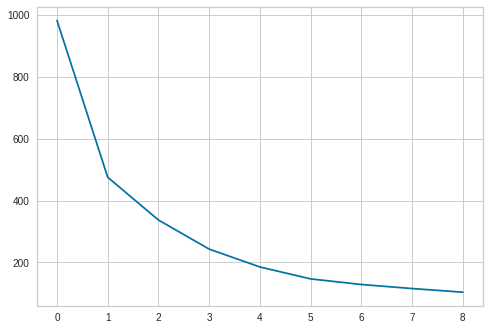

In [125]:
inertia = []
for i in range(1,10):  
  km = KMeans(n_clusters=i).fit(country_data_pca)
  inertia.append(km.inertia_)

plt.plot(inertia)

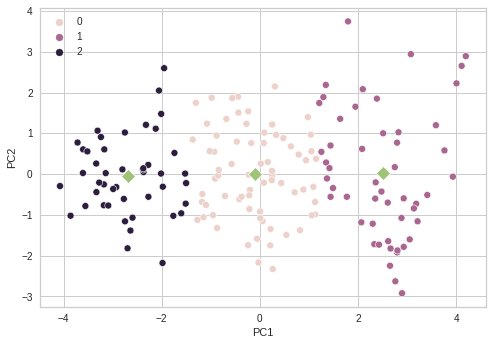

In [126]:
km3 = KMeans(n_clusters=3, random_state=42).fit(country_data_pca)
clusters = km3.labels_
centers = km3.cluster_centers_

sns.scatterplot(x='PC1', y='PC2', hue=clusters, data=country_data_pca)
sns.scatterplot(x=centers[:,0], y=centers[:,1], marker='D', s=100)

In [127]:
#sns.pairplot(country_data_tidy_scaled, corner=True)

In [128]:
#adding cluster into origin and scaled data
country_data['Clusters'] = clusters
country_data_tidy['Clusters'] = clusters
country_data_tidy_scaled['Clusters'] = clusters
#country_data_pca['Clusters'] = clusters

In [129]:
country_data.groupby('Clusters').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Clusters,,,,,,,,,
0,25.925352,37.864789,6.417324,45.843662,11137.042254,8.772549,71.381690,2.49493,5444.985915
1,6.498039,59.176471,8.103725,54.445098,38368.627451,2.549412,78.839216,1.79098,33849.215686
2,93.755556,25.751089,5.984444,39.979242,2569.622222,12.148778,59.864444,4.97400,1158.000000


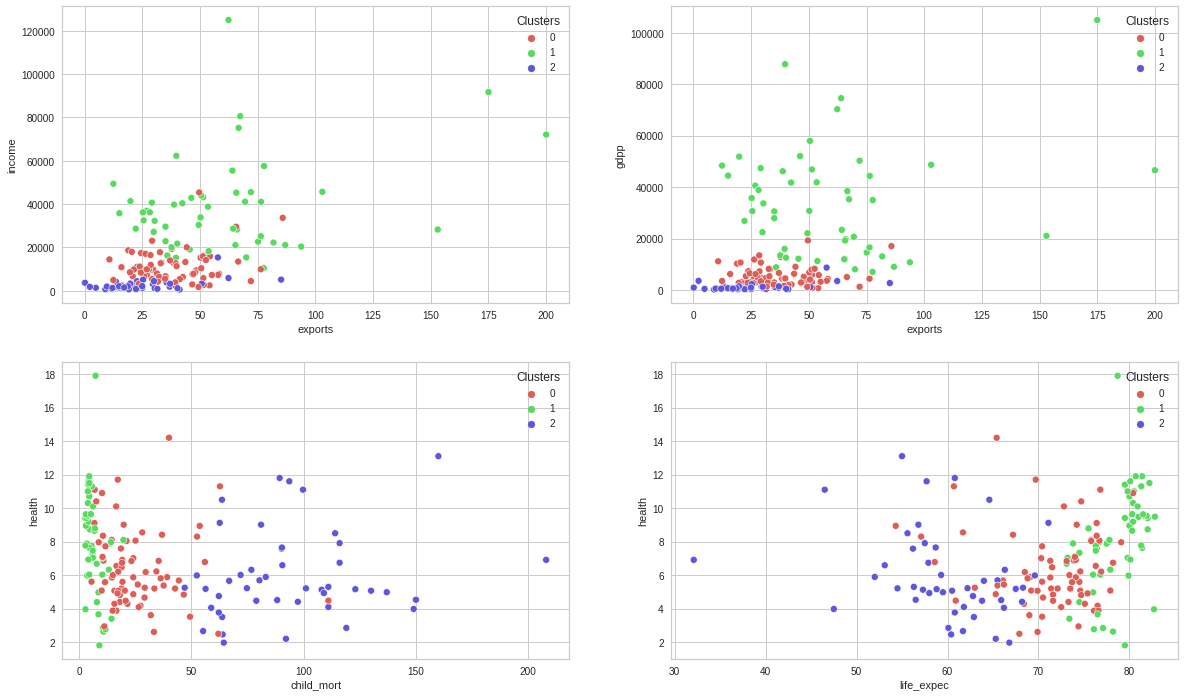

In [130]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))

sns.scatterplot(x='exports', y='income', hue='Clusters', data=country_data, palette=sns.color_palette('hls',3), ax=ax[0][0])
sns.scatterplot(x='exports', y='gdpp', hue='Clusters', data=country_data, palette=sns.color_palette('hls',3), ax=ax[0][1])
sns.scatterplot(x='child_mort', y='health', hue='Clusters', data=country_data, palette=sns.color_palette('hls',3), ax=ax[1][0])
sns.scatterplot(x='life_expec', y='health', hue='Clusters', data=country_data, palette=sns.color_palette('hls',3), ax=ax[1][1])

In [132]:
cat = {0 : 'Might Need Help', 1 : 'No Need Help', 2: 'Need Help'}
country_data['Clusters']=country_data['Clusters'].map(cat)

In [133]:
px.choropleth(data_frame=country_data, locationmode='country names', locations='country', 
              color=country_data['Clusters'], title='Countries by category that need help',
              color_discrete_map={'Need Help' : 'red', 'Might Need Help' : '#DBDB3B', 'No Need Help' : '#51A2DB'},
              projection='equirectangular')

In [134]:
px.choropleth(data_frame=country_data, locationmode='country names', locations='country', 
              color=country_data['Clusters'], title='Asian Countries by Category That Need Help',
              color_discrete_map={'Need Help' : 'red', 'Might Need Help' : '#DBDB3B', 'No Need Help' : '#51A2DB'},
              projection='equirectangular', scope='asia')

In [135]:
px.choropleth(data_frame=country_data, locationmode='country names', locations='country', 
              color=country_data['Clusters'], title='African Countries by Category That Need Help',
              color_discrete_map={'Need Help' : 'red', 'Might Need Help' : '#DBDB3B', 'No Need Help' : '#51A2DB'},
              projection='equirectangular', scope='africa')

In [140]:
print(f'davies_bouldin_score  : {davies_bouldin_score(country_data_pca, clusters)}')
print(f'silhouette_score      : {silhouette_score(country_data_pca, clusters)}')

davies_bouldin_score  : 0.9896889771179955
silhouette_score      : 0.36400746182144744


# SUMMARY

1. Most Country in Africa fall into "Need Help" Category
2. Most Country in Asia fall into "Might Need Help" Category
3. No Country in America, Australia, Europe that fall into "Need Help" Category